In [27]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def plot(experiment_path):
    with open(experiment_path, 'r') as json_file:
        results = json.load(json_file)
        N = results['N']
        nruns = results['nruns']
        crange = np.linspace(*results['crange'])
        results = results['results']

    T = []
    for result in results:
        T.append(np.mean([
            max(item['t'] for item in run['cascade'])
            for run in result['runs']
        ]))
    c_crit = crange[np.argmax(T)]
    print(c_crit)

    max_t = max(item['t']
                for result in results
                for run in result['runs']
                for item in run['cascade'])

    n_ap = {t: [] for t in range(max_t + 1)}
    gcc_size = {t: [] for t in range(max_t + 1)}

    for result in results:

        n_ap_loc = {t: 0 for t in range(max_t + 1)}
        gcc_size_loc = {t: 0 for t in range(max_t + 1)}
        num_gcc_t = {t: 0 for t in range(max_t + 1)}

        for run in result['runs']:
            for item in run['cascade']:

                n_ap_loc[item['t']] += item['n_ap']
                gcc_size_loc[item['t']] += item['gcc_size']
                num_gcc_t[item['t']] += 1

        for t in range(max_t + 1):

            n_ap[t].append(n_ap_loc[t] / nruns / N)
            gcc_size[t].append(gcc_size_loc[t] / num_gcc_t[t] / N
                               if num_gcc_t[t]
                               else gcc_size[t - 1][-1])

    return crange, n_ap, gcc_size, T, max_t, c_crit

In [29]:
save_results = True

In [43]:
experiment_paths = [
    'articulation_points_monoplex/results/hyperbolic_5000/results_hyperbolic_5000.json',
    'articulation_points_multiplex/results/hyperbolic_5000/results_hyperbolic_5000.json',
]
xmax = [12, 12]

lw, lwf, ms = 1, 3, 5
alpha = 1
max_t_for_plots = 10

fontsize = 36
xlabelsize = 26
ylabelsize = 22
legendsize = 18

stripe_color = 'tab:cyan'
intermediate_lines_color = '#f39c12'

In [44]:
plt.rc('text', usetex=True)
plt.rc('font', size=36, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

6.818391959798995
9.288693467336683


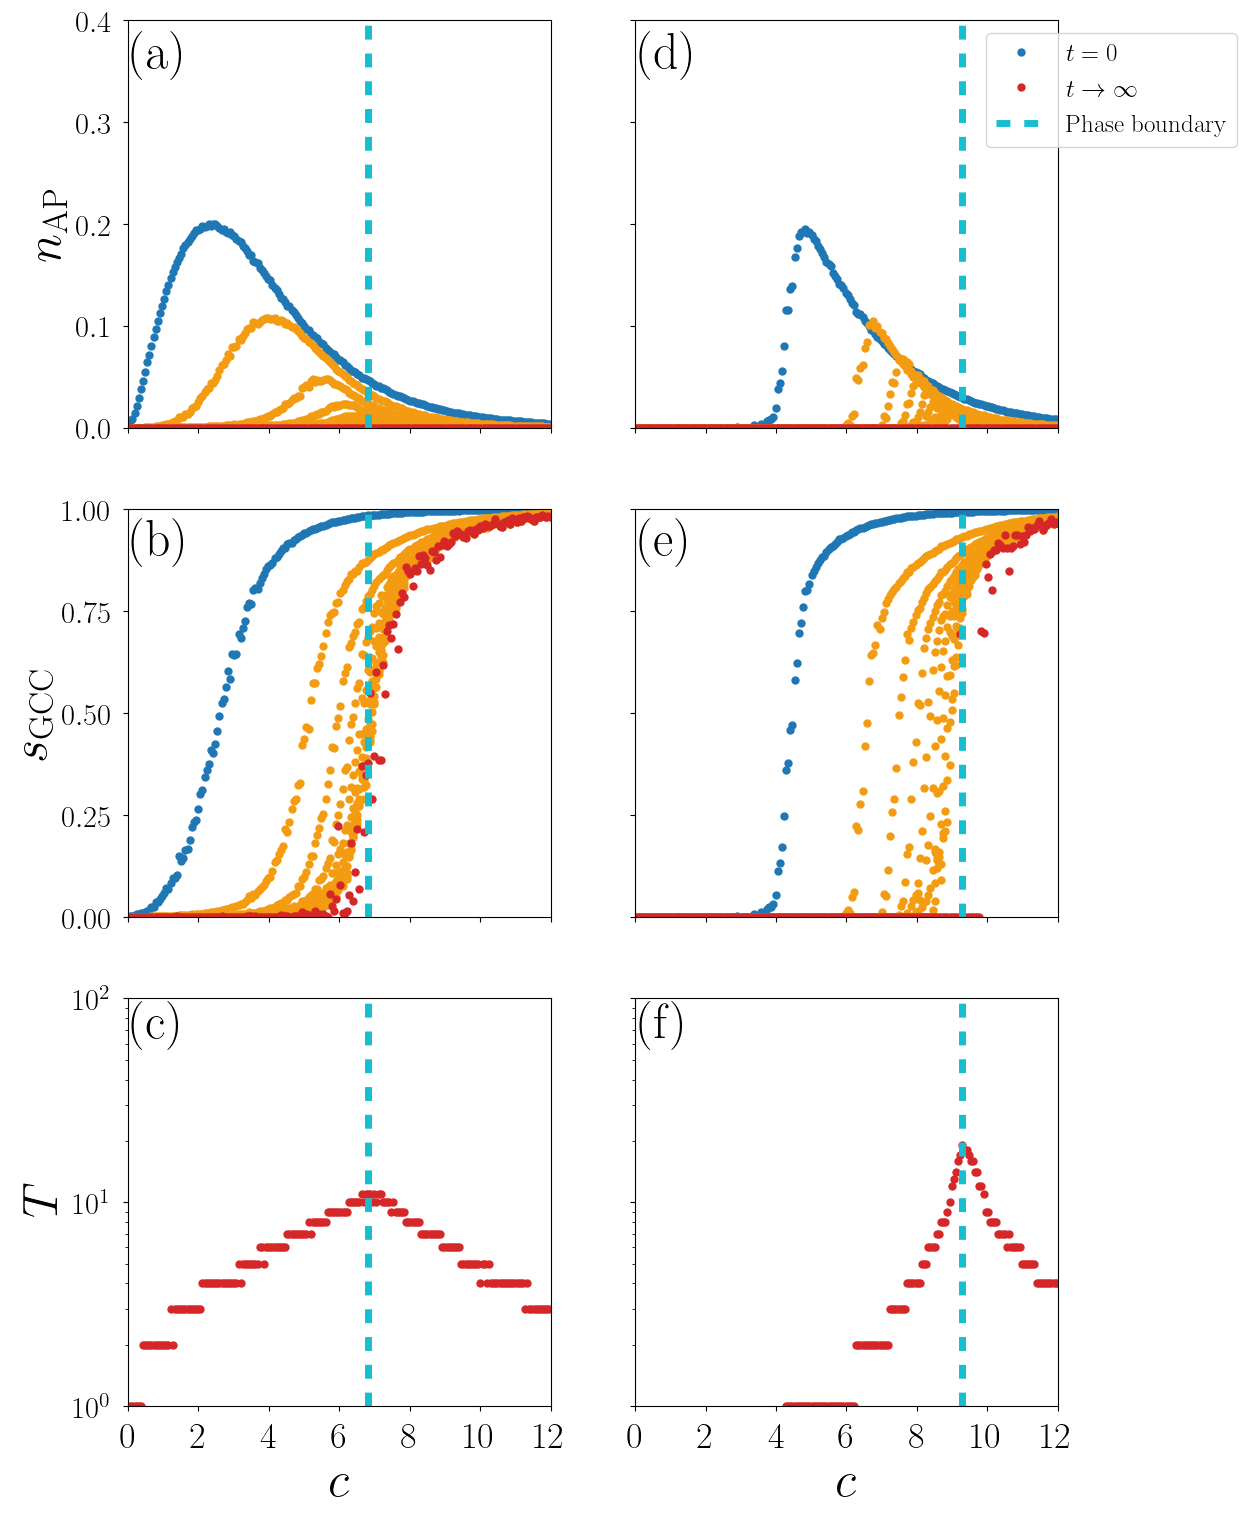

In [46]:
nr, nc = 3, 2
plt.subplots(
    nrows=nr, ncols=nc, sharex='col', sharey='row',
    figsize=(12, 18),
)
pos_init = np.array([1, 3, 5])
annot = iter('abcdefhijklm')

for i, experiment_path in enumerate(experiment_paths):
    (
        crange,
        n_ap,
        gcc_size,
        T,
        max_t,
        c_crit,
    ) = plot(experiment_path)

    pos = pos_init + i

    plt.subplot(nr, nc, pos[0])
    plt.plot(crange, n_ap[0], 'o', lw=lw, ms=ms, color='tab:blue', label='$t = 0$')
    for t in range(1, max_t_for_plots):
        plt.plot(crange, n_ap[t], 'o', lw=lw, ms=ms, color=intermediate_lines_color)
    plt.plot(crange, n_ap[max_t], 'o', lw=lwf, ms=ms, color='tab:red', label=fr'$t \rightarrow \infty$')
    # plt.plot(crange_ana, n_ap_ana, '-', lw=1.5, color='tab:orange', label='$\mathrm{theory}$')
    plt.axvline(x=c_crit, linewidth=5, ls='--', alpha=alpha, c=stripe_color, dashes=(2, 2),
                label='$\mathrm{Phase\ boundary}$')
    plt.annotate(fr'$\mathrm{{({next(annot)})}}$', (.1, .39), ha='left', va='top')
    plt.xlim(0, xmax[i])
    plt.ylim(0, .4)
    # plt.xlabel('$c$', fontdict={'size': fontsize})
    if i == 0:
        plt.yticks(ticks=np.arange(0, .5, .1))
        plt.ylabel('$n_{\mathrm{AP}}$', fontdict={'size': fontsize})
    plt.tick_params(
        # labelbottom=True,
        axis='y',
        which='major',
        labelsize=ylabelsize,
    )
    if i == 1:
        plt.legend(fontsize=legendsize, loc='upper left', bbox_to_anchor=(.8, 1))

    plt.subplot(nr, nc, pos[1])
    plt.plot(crange, gcc_size[0], 'o', lw=lw, ms=ms, color='tab:blue', label='$t = 0$')
    # for t in range(1, max_t_for_plots + 1):
    for t in range(1, max_t_for_plots):
        plt.plot(crange, gcc_size[t], 'o', lw=lw, ms=ms, color=intermediate_lines_color)
    # plt.plot(crange, gcc_inf, 'o-', lw=lw, ms=ms, color='tab:red', label='$t = \infty$')
    plt.plot(crange, gcc_size[max_t], 'o', lw=lwf, ms=ms, color='tab:red', label=fr'$t \rightarrow \infty$')
    plt.axvline(x=c_crit, linewidth=5, ls='--', alpha=alpha, c=stripe_color, dashes=(2, 2))
    plt.annotate(fr'$\mathrm{{({next(annot)})}}$', (.1, .98), ha='left', va='top')
    plt.xlim(0, xmax[i])
    plt.ylim(0, 1)
    # plt.xlabel('$c$', fontdict={'size': fontsize})
    if i == 0:
        plt.yticks(ticks=np.arange(0, 1.1, 0.25))
        plt.ylabel('$s_{\mathrm{GCC}}$', fontdict={'size': fontsize})
    plt.tick_params(
        # labelbottom=True,
        axis='y',
        which='major',
        labelsize=ylabelsize,
    )
    # plt.legend(fontsize=legendsize)

    plt.subplot(nr, nc, pos[2])
    plt.semilogy(crange, np.rint(T), 'o', ms=ms, lw=lw, color='tab:red', label=r'$t \rightarrow \infty$')
    plt.axvline(x=c_crit, linewidth=5, ls='--', alpha=alpha, c=stripe_color, dashes=(2, 2))
    plt.annotate(fr'$\mathrm{{({next(annot)})}}$', (.1, 98), ha='left', va='top')
    plt.xlim(0, xmax[i])
    plt.ylim(1, 100)
    plt.xticks(ticks=range(0, xmax[i] + 1, 2))
    plt.xlabel('$c$', fontdict={'size': fontsize})
    if i == 0:
        plt.yticks(ticks=[1, 10, 100])
        plt.ylabel('$T$', fontdict={'size': fontsize})
    plt.tick_params(axis='x', which='major', labelsize=xlabelsize)
    plt.tick_params(axis='y', which='major', labelsize=ylabelsize)
    # if i == 3:
    #     plt.legend(fontsize=legendsize)

    pos += 1

    if save_results:
        plt.savefig('percolation_hyperbolic_work_revision.pdf')
        plt.savefig('percolation_hyperbolic_work_revision.png')

In [65]:
np.arange(7., 10. + .05, .05).shape

(62,)